In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# https://www.kaggle.com/datasets/yasserh/student-marks-dataset
marks_df = pd.read_csv('Student_Marks.csv')
marks_df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [2]:
marks_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [3]:
marks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


Here we create and train a simple regression model of time_study to Marks
We have X and y our train dataset. 

Simple regression will be LinearRegression. Because LinearRegression it's just a straight line which predicts result. Linear regression from math side it's function **y = ax + b**. Where **x** is input values, **y** is out value, **a** is slope and **b** is intercept. In ML slope is also **regression coefficient**


model.fit(X,y) we use for fit data for model, where first parameter is train data and y is target values.



In [4]:
X = marks_df['time_study'].values.reshape(-1,1)[:100]
y = marks_df['Marks'].values.reshape(-1)[:100]

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 
model.fit(X,y)

LinearRegression(n_jobs=1)

Here we evaluate and visualise created model. We use model.predict to predict using linear model, where first parameter is samples. After we get predicted values we draw a curve. And we can see the straight line which predicts results using input values.

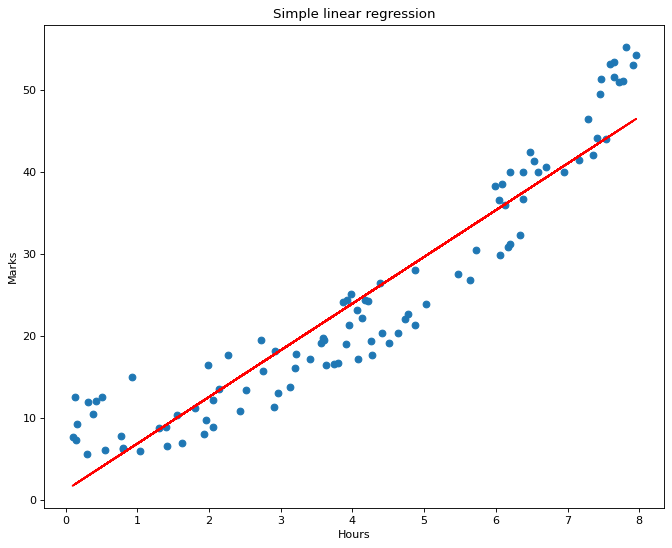

1.2238581075029629
[5.68875042]
0.8878423939061949


In [5]:
pr = model.predict(X)

plt.figure(figsize=(10,8),dpi=80)
plt.scatter(X,y)
plt.plot(X,pr, color = 'r')
plt.title("Simple linear regression")
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.ticklabel_format(style = 'plain')
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.score(X,y))

Now we create and plot higher-order polynomial regression models. LinearRegression was the polynomial regression too, but with degree=1
So here we train our model by adding polynomial features, which are degrees of the polynomial. And we use a pipeline for transformation data to the model.

Because we should fit data somehow to model and I couldn't do it without pipeline. Also we should look at shape of our data.
We can see that curves of our prediction are different, because of polynomial's degree. 

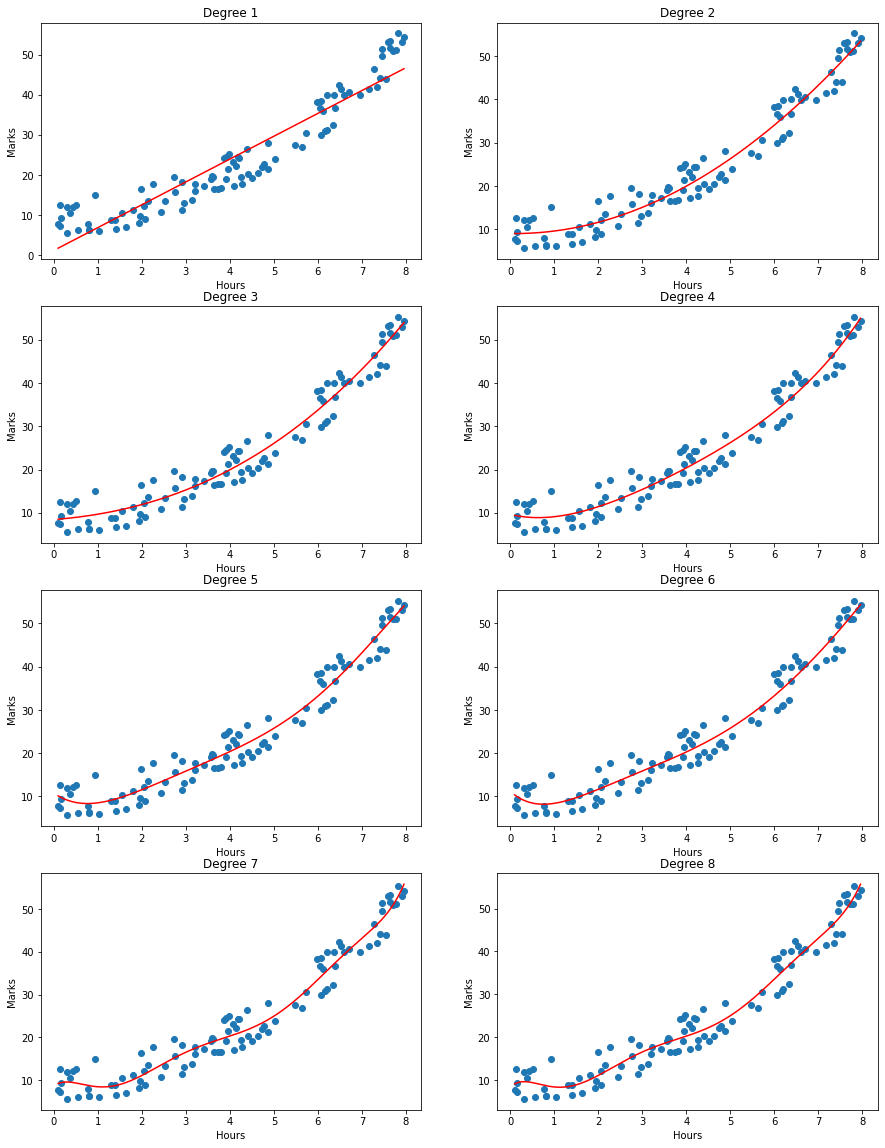

In [6]:
plt.figure(figsize=(15,20))
error, degree = [], []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    error.append(mean_squared_error(y, y_pr))
    degree.append(order)
    
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
    ax.title.set_text('Degree {d}'.format(d=order))
    ax.xaxis.label.set_text('Hours')
    ax.yaxis.label.set_text('Marks')
    ax.ticklabel_format(style = 'plain')



```
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    error.append(mean_squared_error(y, y_pr))
    degree.append(order)
```
This part of code calculates mean squared error. Mean Squared Error (MSE): it squares the absolute values of the errors. Also the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.


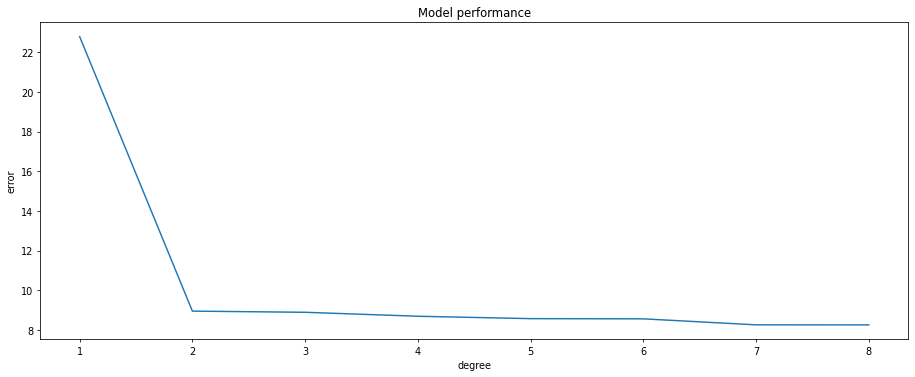

In [7]:
plt.figure(figsize=(16, 6), dpi=70)
plt.plot(degree, error)
plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

Here we split data into the training sample and the test sample and repeat our steps. We have two train data_set and two test data_set and do the same things which I described previously.

In [8]:
error_train, error_test, degree = [], [], []
model_linear = LinearRegression()
for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    
    poly = PolynomialFeatures(order, include_bias = False)
    x_train_poly = poly.fit_transform(X_train)
    x_test_poly = poly.fit_transform(X_test)
    #errors
    model_linear.fit(x_train_poly, y_train)
    y_train_pr = model_linear.predict(x_train_poly)
    y_test_pr = model_linear.predict(x_test_poly)

    error_train.append(mean_squared_error(y_train, y_train_pr))
    error_test.append(mean_squared_error(y_test, y_test_pr))
    degree.append(order)


Here we have two plots and we can see difference between test and train datasets. That train dataset has less error because of we trained this model on this data. But we have higher error from test dataset, because of model "saw" this data first time.

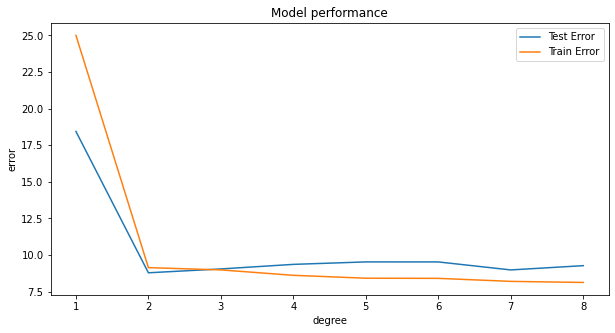

In [9]:
plt.figure(figsize=(10,5))
plt.plot(degree, error_test, label="Test Error")
plt.plot(degree, error_train, label="Train Error")

plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.legend()
plt.show()

Here we train model to predict sqft_living for a given house price. We do the same steps how previously. But we have others input and output-predicton values.

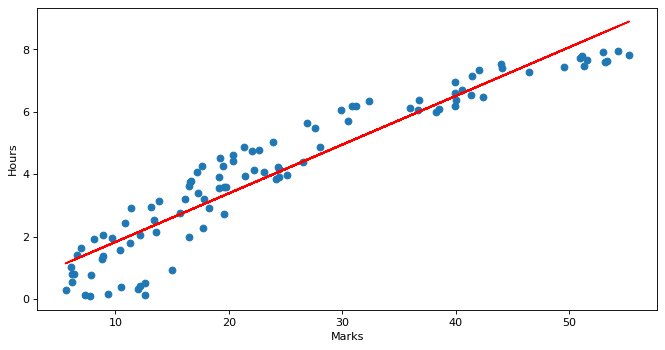

In [10]:
X = marks_df['Marks'].values.reshape(-1,1)[:100]
y = marks_df['time_study'].values.reshape(-1,1)[:100]

model_linear = LinearRegression()
model_linear.fit(X,y)
y_pr = model_linear.predict(X)

plt.figure(figsize=(10,5),dpi=80)
plt.scatter(X,y)
plt.plot(X,y_pr, color = 'r')
plt.ticklabel_format(style = 'plain')
plt.xlabel('Marks')
plt.ylabel('Hours')
plt.show()

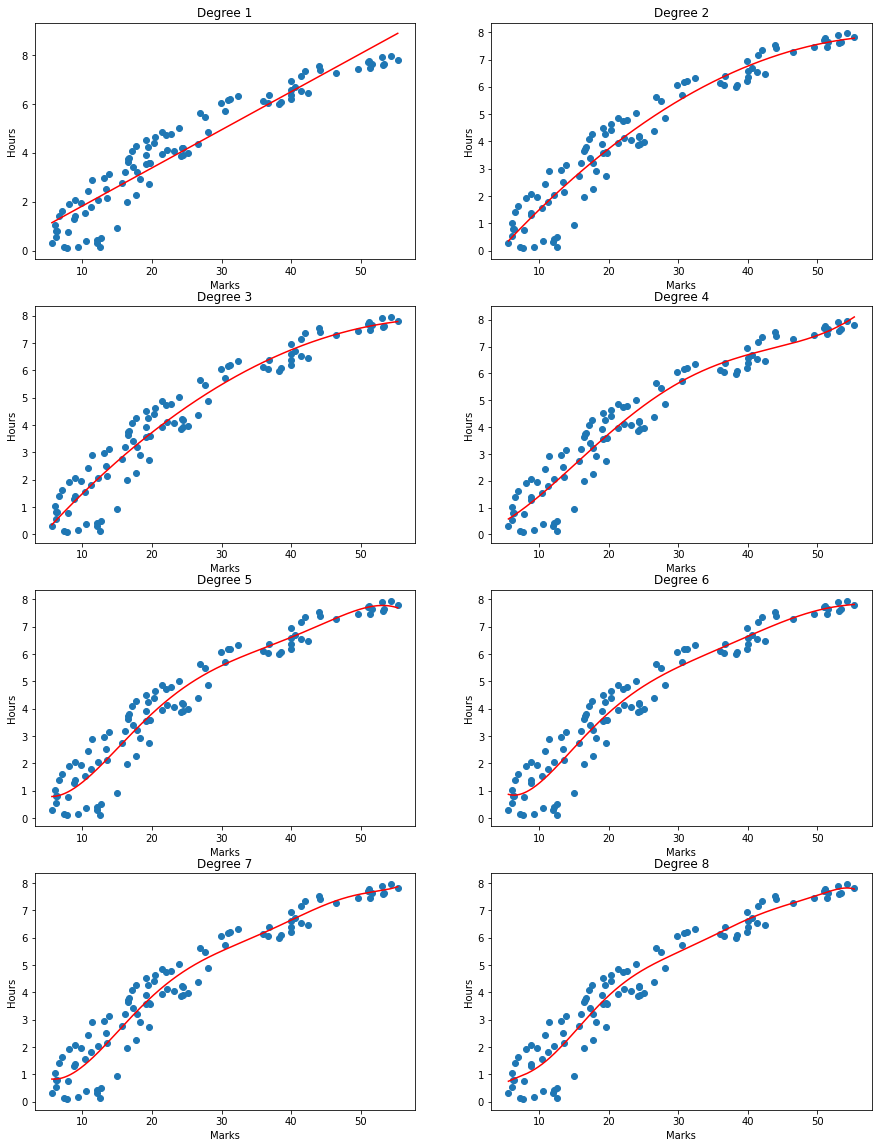

In [11]:
plt.figure(figsize=(15,20))
error, degree = [], []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    error.append(mean_squared_error(y, y_pr))
    degree.append(order)
    
    #Your code:
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
    ax.title.set_text('Degree {d}'.format(d=order))
    ax.xaxis.label.set_text('Marks')
    ax.yaxis.label.set_text('Hours')
    ax.ticklabel_format(style = 'plain')

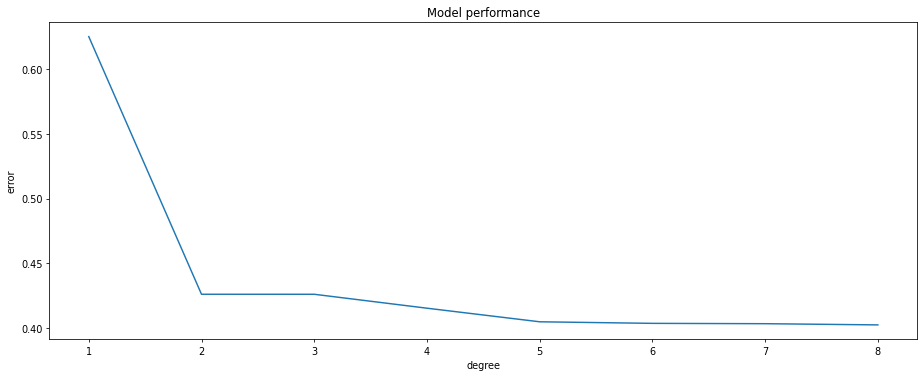

In [12]:
plt.figure(figsize=(16, 6), dpi=70)
plt.plot(degree, error)
plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

We apply more features and propose better model for predicting marks.  Here we just add one more feature number_courses and compare errors. Train_test_split helps to us split data to train and test datasets.

In [13]:
X = marks_df['time_study'].values.reshape(-1,1)
y = marks_df.Marks.values.reshape(-1)

poly = PolynomialFeatures(4, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 9.081692588032483


In [14]:
X = marks_df[['number_courses','time_study']].values.reshape(-1,2)
y = marks_df.Marks.values.reshape(-1)

poly = PolynomialFeatures(4, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 0.10091544653348944
